# **Libraries**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns
from PIL import Image
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 544.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.8 MB/s eta 0:00:00


# **Exploratory Data Analysis**

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the base path
base_path = '/content/drive/My Drive/archive-2'

# Define the subdirectories
subdirs = ['test', 'train']

# Iterate through each subdirectory
for subdir in subdirs:
    path = os.path.join(base_path, subdir)
    if os.path.exists(path):
        print(f"Contents of {path}:")
        for item in os.listdir(path):
            print(f"  - {item}")
    else:
        print(f"{path} does not exist.")


Mounted at /content/drive
Contents of /content/drive/My Drive/archive-2/test:
  - tomatoes
  - apples
Contents of /content/drive/My Drive/archive-2/train:
  - apples
  - tomatoes


In [ ]:
# Define the subdirectories and categories
subdirs = ['test', 'train']
categories = ['tomatoes', 'apples']

# Function to count images
def count_images(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

# Iterate through each subdirectory and category
for subdir in subdirs:
    for category in categories:
        path = os.path.join(base_path, subdir, category)
        if os.path.exists(path):
            image_count = count_images(path)
            print(f"Number of images in {subdir}/{category} folder: {image_count}")
        else:
            print(f"{path} does not exist.")


Number of images in test/tomatoes folder: 43
Number of images in test/apples folder: 54
Number of images in train/tomatoes folder: 130
Number of images in train/apples folder: 164


Displaying images from test/tomatoes folder:


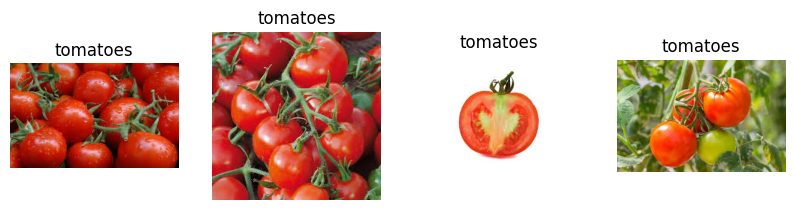

Displaying images from test/apples folder:


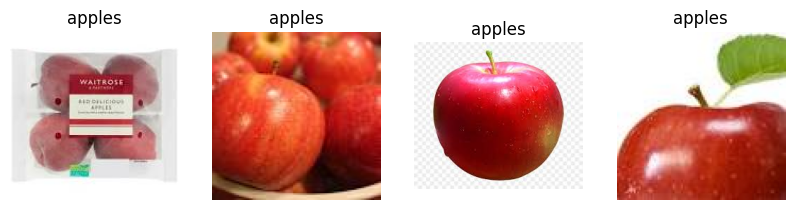

Displaying images from train/tomatoes folder:


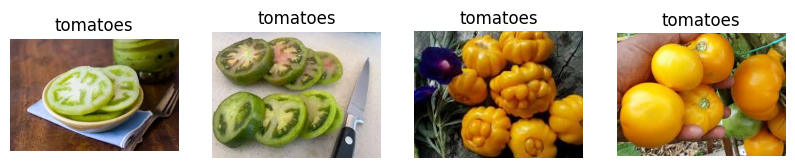

Displaying images from train/apples folder:


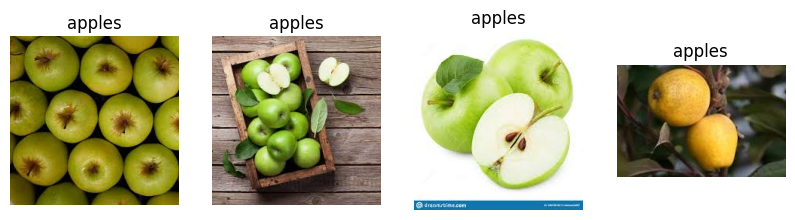

In [ ]:
base_path ='/content/drive/My Drive/archive-2'
# Define the subdirectories and categories
subdirs = ['test', 'train']
categories = ['tomatoes', 'apples']

# Function to display images from a folder
def display_images(folder_path, category):
    images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    plt.figure(figsize=(10, 10))
    for i, image_path in enumerate(images[:4]):  # Display up to 4 images per category
        img = mpimg.imread(image_path)
        plt.subplot(1, 4, i+1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
    plt.show()

# Iterate through each subdirectory and category to display images
for subdir in subdirs:
    for category in categories:
        path = os.path.join(base_path, subdir, category)
        if os.path.exists(path):
            print(f"Displaying images from {subdir}/{category} folder:")
            display_images(path, category)
        else:
            print(f"{path} does not exist.")

Displaying images from test/tomatoes folder:


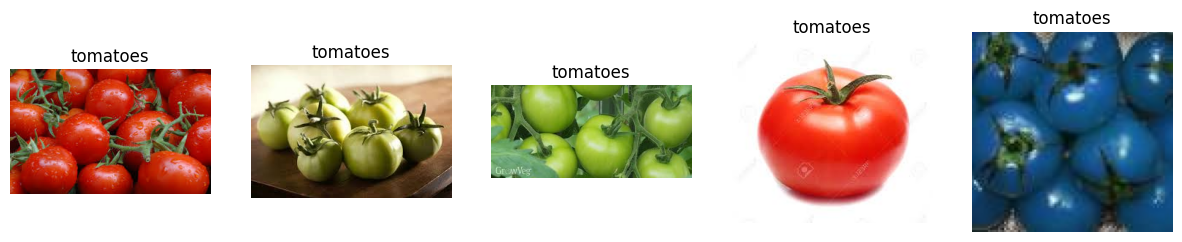

Displaying images from test/apples folder:


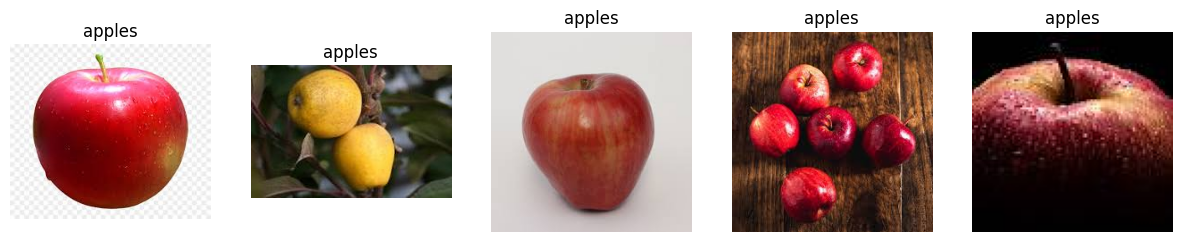

Displaying images from train/tomatoes folder:


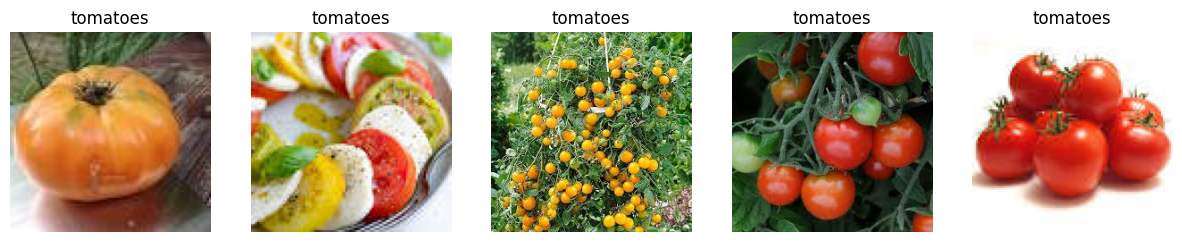

Displaying images from train/apples folder:


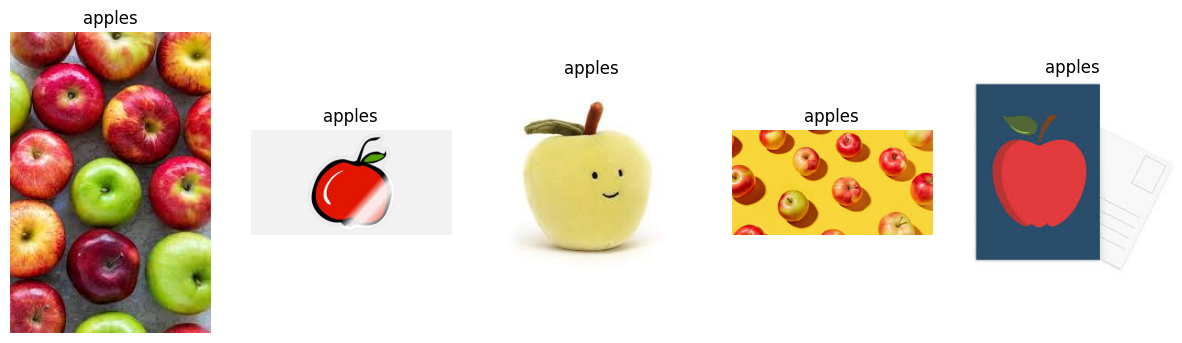

In [ ]:
# Define the base path
base_path ='/content/drive/My Drive/archive-2'
# Define the subdirectories and categories
subdirs = ['test', 'train']
categories = ['tomatoes', 'apples']

# Function to display images from a folder
def display_images(folder_path, category, num_images=5):
    images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    plt.figure(figsize=(15, 5))  # Adjust figure size for better layout
    for i, image_path in enumerate(images[:num_images]):
        img = mpimg.imread(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
    plt.show()

# Iterate through each subdirectory and category to display images
for subdir in subdirs:
    for category in categories:
        path = os.path.join(base_path, subdir, category)
        if os.path.exists(path):
            print(f"Displaying images from {subdir}/{category} folder:")
            display_images(path, category)
        else:
            print(f"{path} does not exist.")

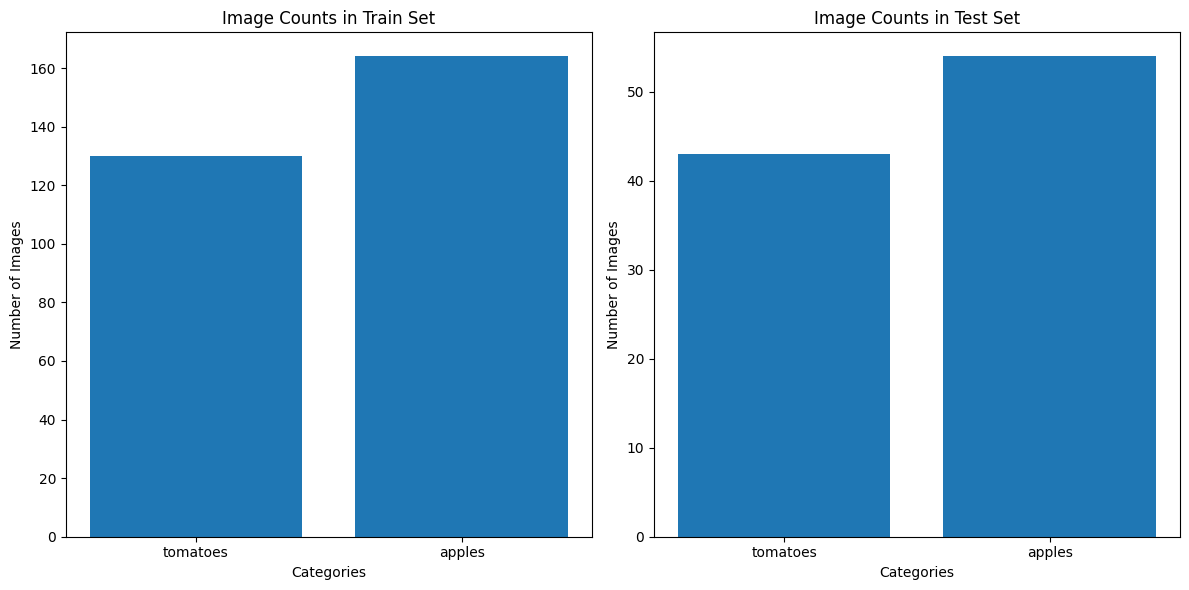

In [ ]:
image_counts = {}
for subdir in subdirs:
    image_counts[subdir] = {}
    for category in categories:
        path = os.path.join(base_path, subdir, category)
        if os.path.exists(path):
            image_counts[subdir][category] = count_images(path)
        else:
            image_counts[subdir][category] = 0


# Create histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(image_counts['train'].keys(), image_counts['train'].values())
plt.title('Image Counts in Train Set')
plt.xlabel('Categories')
plt.ylabel('Number of Images')


plt.subplot(1, 2, 2)
plt.bar(image_counts['test'].keys(), image_counts['test'].values())
plt.title('Image Counts in Test Set')
plt.xlabel('Categories')
plt.ylabel('Number of Images')


plt.tight_layout()
plt.show()


## **Images size**

In [ ]:
#The size of the images
# Iterate through each subdirectory and category
for subdir in subdirs:
    for category in categories:
        path = os.path.join(base_path, subdir, category)
        if os.path.exists(path):
            for filename in os.listdir(path):
                if filename.endswith(('.jpg', '.jpeg', '.png')):  # Add other image extensions if needed
                    img_path = os.path.join(path, filename)
                    try:
                        img = Image.open(img_path)
                        width, height = img.size
                        print(f"Image: {img_path}, Size: {width}x{height}")
                    except IOError:
                        print(f"Error opening image: {img_path}")
        else:
            print(f"{path} does not exist.")


Image: /content/drive/My Drive/archive-2/test/tomatoes/img_p2_79.jpeg, Size: 275x183
Image: /content/drive/My Drive/archive-2/test/tomatoes/img_p3_103.jpeg, Size: 275x183
Image: /content/drive/My Drive/archive-2/test/tomatoes/img_p1_107.jpeg, Size: 270x187
Image: /content/drive/My Drive/archive-2/test/tomatoes/img_p2_82.jpeg, Size: 100x100
Image: /content/drive/My Drive/archive-2/test/tomatoes/img_p3_124.jpeg, Size: 194x259
Image: /content/drive/My Drive/archive-2/test/tomatoes/img_p1_43.jpeg, Size: 225x225
Image: /content/drive/My Drive/archive-2/test/tomatoes/img_p3_34.jpeg, Size: 100x100
Image: /content/drive/My Drive/archive-2/test/tomatoes/img_p1_92.jpeg, Size: 183x275
Image: /content/drive/My Drive/archive-2/test/tomatoes/img_p2_84.jpeg, Size: 283x178
Image: /content/drive/My Drive/archive-2/test/tomatoes/img_p1_9.jpeg, Size: 100x100
Image: /content/drive/My Drive/archive-2/test/tomatoes/img_p2_73.jpeg, Size: 183x275
Image: /content/drive/My Drive/archive-2/test/tomatoes/img_p1_5

# **Model Selection and evaluation**

## **BaseModel VGG16**

Found 294 images belonging to 2 classes.
Found 97 images belonging to 2 classes.
Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 86s 10s/step - accuracy: 0.5689 - loss: 2.1285 - val_accuracy: 0.7188 - val_loss: 0.7651
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.8125 - loss: 0.5505 - val_accuracy: 0.6667 - val_loss: 0.9767
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 83s 9s/step - accuracy: 0.7389 - loss: 0.8378 - val_accuracy: 0.8021 - val_loss: 0.5554
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8125 - loss: 0.4161 - val_accuracy: 0.8125 - val_loss: 0.5175
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 82s 9s/step - accuracy: 0.8444 - loss: 0.4102 - val_accuracy: 0.8125 - val_loss: 0.4836
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.8750 - loss: 0.2346 - val_accuracy: 0.8125 - val_loss: 0.5168
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 82s 9s/step - accuracy: 0.8366 - loss: 0.3936 - val_accuracy: 0.8542 - val_loss: 0.4219
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - 

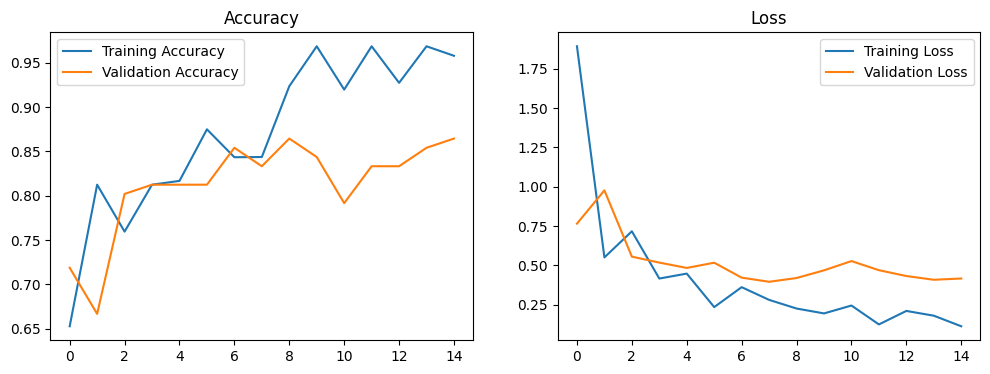

In [ ]:
# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32
epochs = 15

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(base_path, 'train'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    os.path.join(base_path, 'test'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False # Important for evaluating with confusion matrix
)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(2, activation='softmax')(x)  # Assuming 2 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(validation_generator.classes, y_pred)
print(cm)
print('Classification Report')
target_names = list(validation_generator.class_indices.keys())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


## **L2 Regularization and Dropout VGG16**

Found 294 images belonging to 2 classes.
Found 97 images belonging to 2 classes.
Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 85s 9s/step - accuracy: 0.5360 - loss: 7.9231 - val_accuracy: 0.6979 - val_loss: 4.8808
Epoch 2/15
1/9 ━━━━━━━━━━━━━━━━━━━━ 59s 7s/step - accuracy: 0.7500 - loss: 6.0678

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


9/9 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.7500 - loss: 6.0678 - val_accuracy: 0.7500 - val_loss: 4.6245
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 83s 9s/step - accuracy: 0.6323 - loss: 6.1386 - val_accuracy: 0.7292 - val_loss: 4.4701
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.5938 - loss: 5.8064 - val_accuracy: 0.7396 - val_loss: 4.3820
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 83s 9s/step - accuracy: 0.6502 - loss: 5.2633 - val_accuracy: 0.7812 - val_loss: 3.8642
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.7500 - loss: 3.8711 - val_accuracy: 0.7292 - val_loss: 3.8697
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 82s 9s/step - accuracy: 0.6846 - loss: 4.1825 - val_accuracy: 0.7917 - val_loss: 3.3058
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.7812 - loss: 3.5297 - val_accuracy: 0.7812 - val_loss: 3.2748
Epoch 9/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 82s 9s/step - accuracy: 0.7304 - loss: 3.3547 - val_accuracy: 0.7917 - val_loss: 2.9221
Epoch 10/15
9/9 ━━━

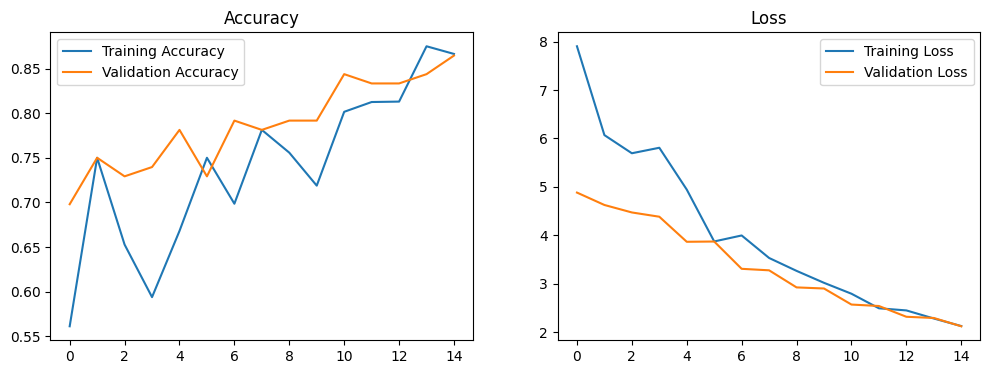

In [ ]:
from tensorflow.keras.regularizers import l2

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32
epochs = 15

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(base_path, 'train'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    os.path.join(base_path, 'test'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification layers with L2 regularization and dropout
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)  # L2 regularization
x = Dropout(0.5)(x)  # Dropout for regularization
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)  # Another L2 regularized layer
x = Dropout(0.5)(x)  # Another dropout layer
predictions = Dense(2, activation='softmax')(x)  # Assuming 2 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with L2 regularization
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(validation_generator.classes, y_pred)
print(cm)
print('Classification Report')
target_names = list(validation_generator.class_indices.keys())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


## **After Noise and unrelated images removal**

In [ ]:
# Define the subdirectories and categories
subdirs = ['test', 'train']
categories = ['tomatoes', 'apples']

# Function to count images
def count_images(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

# Iterate through each subdirectory and category
for subdir in subdirs:
    for category in categories:
        path = os.path.join(base_path, subdir, category)
        if os.path.exists(path):
            image_count = count_images(path)
            print(f"Number of images in {subdir}/{category} folder: {image_count}")
        else:
            print(f"{path} does not exist.")

Number of images in test/tomatoes folder: 31
Number of images in test/apples folder: 47
Number of images in train/tomatoes folder: 84
Number of images in train/apples folder: 164


Displaying images from test/tomatoes folder:


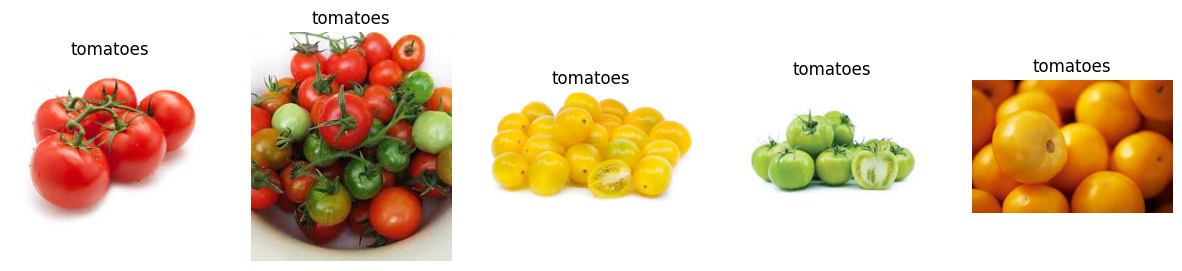

Displaying images from test/apples folder:


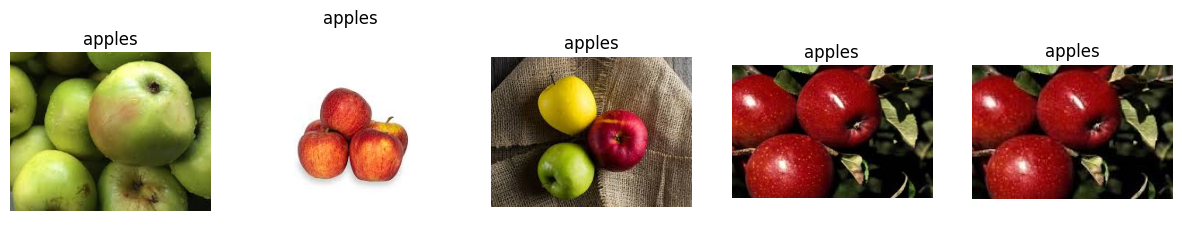

Displaying images from train/tomatoes folder:


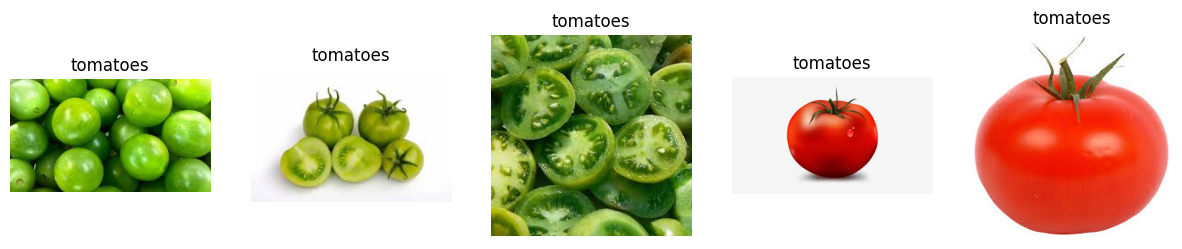

Displaying images from train/apples folder:


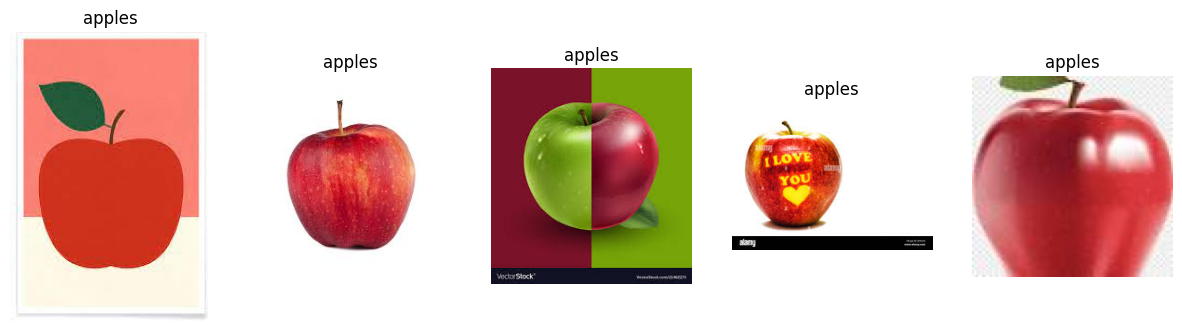

In [ ]:
# Define the base path
base_path ='/content/drive/My Drive/archive-2'
# Define the subdirectories and categories
subdirs = ['test', 'train']
categories = ['tomatoes', 'apples']

# Function to display images from a folder
def display_images(folder_path, category, num_images=5):
    images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    plt.figure(figsize=(15, 5))  # Adjust figure size for better layout
    for i, image_path in enumerate(images[:num_images]):
        img = mpimg.imread(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
    plt.show()

# Iterate through each subdirectory and category to display images
for subdir in subdirs:
    for category in categories:
        path = os.path.join(base_path, subdir, category)
        if os.path.exists(path):
            print(f"Displaying images from {subdir}/{category} folder:")
            display_images(path, category)
        else:
            print(f"{path} does not exist.")

# **Bar graph**

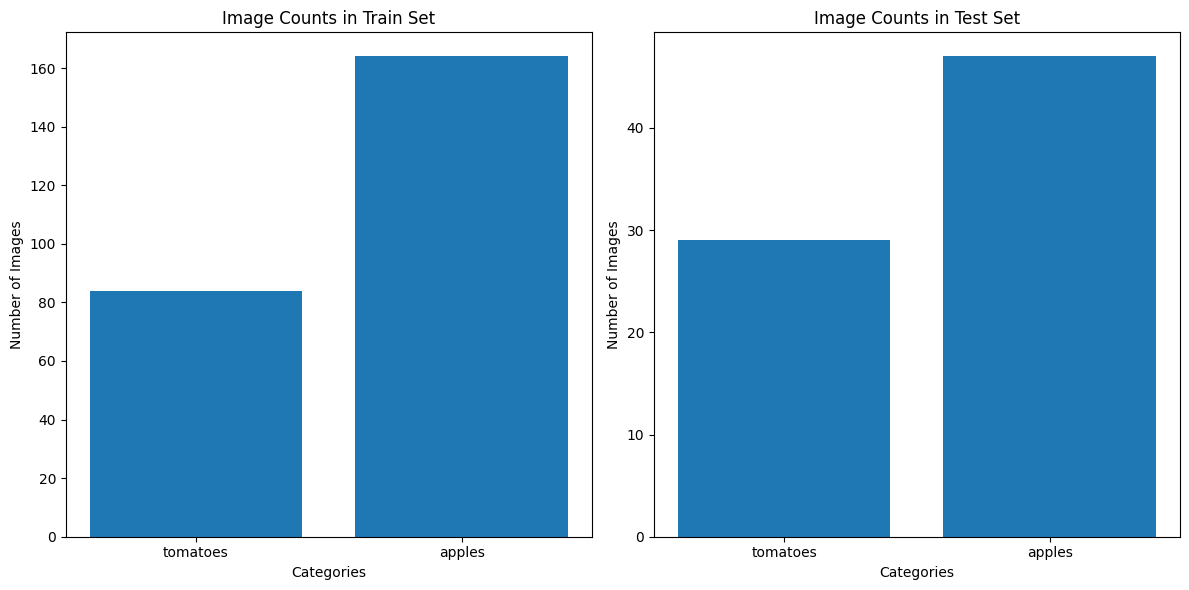

In [ ]:
image_counts = {}
for subdir in subdirs:
    image_counts[subdir] = {}
    for category in categories:
        path = os.path.join(base_path, subdir, category)
        if os.path.exists(path):
            image_counts[subdir][category] = count_images(path)
        else:
            image_counts[subdir][category] = 0


# Create histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(image_counts['train'].keys(), image_counts['train'].values())
plt.title('Image Counts in Train Set')
plt.xlabel('Categories')
plt.ylabel('Number of Images')


plt.subplot(1, 2, 2)
plt.bar(image_counts['test'].keys(), image_counts['test'].values())
plt.title('Image Counts in Test Set')
plt.xlabel('Categories')
plt.ylabel('Number of Images')


plt.tight_layout()
plt.show()


# **VGG16**

Found 248 images belonging to 2 classes.
Found 76 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 87s 13s/step - accuracy: 0.6381 - loss: 3.2646 - val_accuracy: 0.7812 - val_loss: 1.3038
Epoch 2/30
1/7 ━━━━━━━━━━━━━━━━━━━━ 43s 7s/step - accuracy: 0.6250 - loss: 2.0070

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6250 - loss: 2.0070 - val_accuracy: 0.6719 - val_loss: 1.9306
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 66s 10s/step - accuracy: 0.6435 - loss: 2.6152 - val_accuracy: 0.7969 - val_loss: 1.0931
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8125 - loss: 1.0148 - val_accuracy: 0.8281 - val_loss: 0.8577
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 66s 10s/step - accuracy: 0.7043 - loss: 1.7303 - val_accuracy: 0.9062 - val_loss: 0.2282
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8438 - loss: 0.6920 - val_accuracy: 0.8906 - val_loss: 0.2242
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 66s 10s/step - accuracy: 0.8635 - loss: 0.3598 - val_accuracy: 0.9062 - val_loss: 0.2129
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8750 - loss: 0.2752 - val_accuracy: 0.8906 - val_loss: 0.2090
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 65s 9s/step - accuracy: 0.8988 - loss: 0.2399 - val_accuracy: 0.9219 - val_loss: 0.2181
Epoch 10/30
7/7 

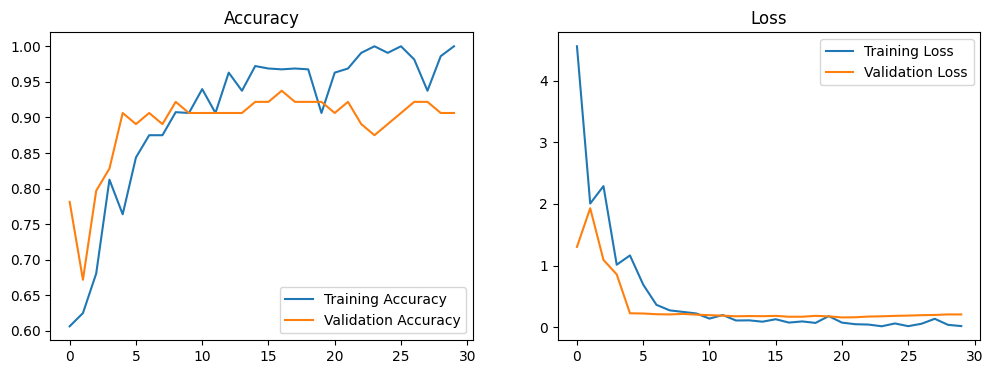

In [ ]:
# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32
epochs = 30

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(base_path, 'train'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    os.path.join(base_path, 'test'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False # Important for evaluating with confusion matrix
)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(2, activation='softmax')(x)  # Assuming 2 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(validation_generator.classes, y_pred)
print(cm)
print('Classification Report')
target_names = list(validation_generator.class_indices.keys())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


# **Fine tuned VGG16**

Found 248 images belonging to 2 classes.
Found 76 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 329s 47s/step - accuracy: 0.4188 - loss: 6.3143 - val_accuracy: 0.3750 - val_loss: 5.8297
Epoch 2/40
1/7 ━━━━━━━━━━━━━━━━━━━━ 3:17 33s/step - accuracy: 0.5000 - loss: 5.8102

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


7/7 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.5000 - loss: 5.8102 - val_accuracy: 0.7344 - val_loss: 5.5842
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 313s 45s/step - accuracy: 0.5498 - loss: 5.9418 - val_accuracy: 0.7656 - val_loss: 5.5916
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7812 - loss: 5.5518 - val_accuracy: 0.7500 - val_loss: 5.5715
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 311s 44s/step - accuracy: 0.6759 - loss: 5.7127 - val_accuracy: 0.7188 - val_loss: 5.5147
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.6875 - loss: 5.6461 - val_accuracy: 0.7656 - val_loss: 5.5330
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 314s 45s/step - accuracy: 0.7247 - loss: 5.6027 - val_accuracy: 0.8281 - val_loss: 5.4492
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.6875 - loss: 5.5490 - val_accuracy: 0.8281 - val_loss: 5.4325
Epoch 9/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 312s 45s/step - accuracy: 0.7992 - loss: 5.4894 - val_accuracy: 0.8438 - val_loss: 5.3532
Epoch 10/40

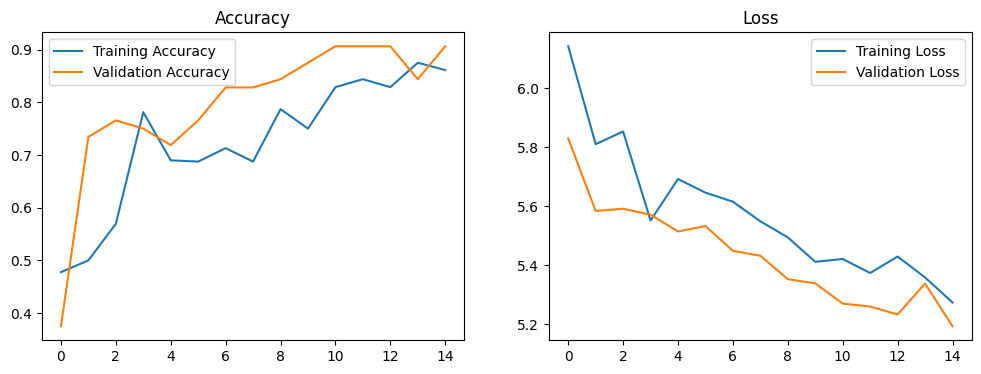

In [ ]:


# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32
epochs = 40  # Increased epochs for better learning

# Enhanced Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,  # Reduced distortion
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=15,
    brightness_range=[0.85, 1.15],  # Adjusted brightness range
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Training and validation data loaders
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_path, 'train'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    os.path.join(base_path, 'test'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Compute class weights for balanced training
class_weights = compute_class_weight('balanced', classes=np.unique(validation_generator.classes), y=validation_generator.classes)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Unfreeze last few layers for fine-tuning
for layer in base_model.layers[-6:]:  # Increased number of unfrozen layers
    layer.trainable = True

# Add custom classification layers with L2 regularization
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = Dropout(0.6)(x)  # Increased dropout for regularization
predictions = Dense(2, activation='softmax')(x)  # Adjust for class count

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model using SGD + momentum for better generalization
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Introduce Early Stopping with adjusted patience
early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)

# Train the model with class weighting
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    class_weight=class_weight_dict,
    callbacks=[early_stopping]
)

# Evaluate the model
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Print confusion matrix
print('Confusion Matrix')
cm = confusion_matrix(validation_generator.classes, y_pred)
print(cm)

# Print classification report
target_names = list(validation_generator.class_indices.keys())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


# **VGG19 with data augmentation**

Found 210 images belonging to 2 classes.
Found 68 images belonging to 2 classes.
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 91s 16s/step - accuracy: 0.5773 - loss: 4.4506 - val_accuracy: 0.6406 - val_loss: 10.2392
Epoch 2/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 43s 9s/step - accuracy: 0.7500 - loss: 6.7747

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.7500 - loss: 6.7747 - val_accuracy: 0.6406 - val_loss: 9.0617
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 68s 12s/step - accuracy: 0.6665 - loss: 5.8296 - val_accuracy: 0.8438 - val_loss: 0.4631
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.8125 - loss: 0.7331 - val_accuracy: 0.7656 - val_loss: 1.2574
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 68s 12s/step - accuracy: 0.7793 - loss: 1.2417 - val_accuracy: 0.8281 - val_loss: 0.5245
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.9688 - loss: 0.0817 - val_accuracy: 0.7812 - val_loss: 0.5707
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 71s 12s/step - accuracy: 0.7460 - loss: 0.8213 - val_accuracy: 0.7656 - val_loss: 1.1897
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.8889 - loss: 0.4287 - val_accuracy: 0.7344 - val_loss: 1.2696
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 68s 12s/step - accuracy: 0.8709 - loss: 0.3671 - val_accuracy: 0.8281 - val_loss: 0.5938
Epoch 10/30
6/6

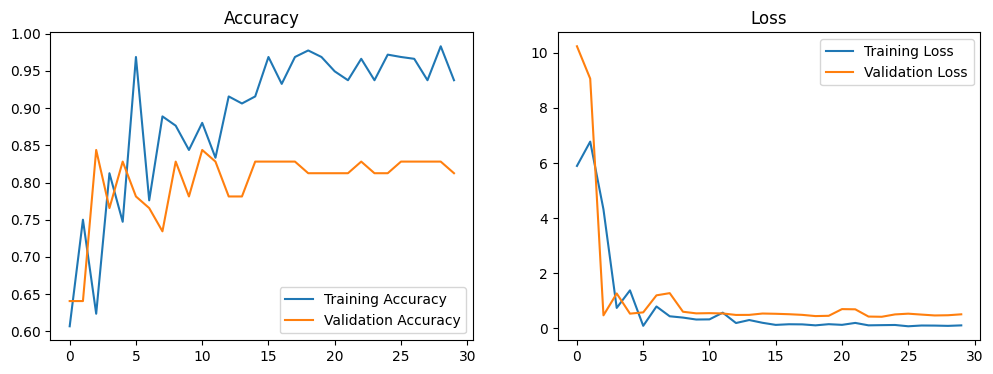

In [ ]:


# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32
epochs = 30

# Data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/archive-2/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/archive-2/test',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
print('Confusion Matrix')
print(cm)

# Classification Report
target_names = list(validation_generator.class_indices.keys())
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

##**Fine tuned model VGG19**

In [ ]:
import tensorflow as tf

def adjust_contrast(image):
    return tf.image.adjust_contrast(image, contrast_factor=2.0)  # Adjust contrast factor

# Example: Apply contrast adjustment on a batch
for batch in train_generator:
    batch_images = batch[0]  # Extract images from batch
    contrast_adjusted_images = adjust_contrast(batch_images)
    break


Found 210 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 329s 54s/step - accuracy: 0.5187 - loss: 1.2208 - val_accuracy: 0.6406 - val_loss: 0.6193
Epoch 2/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 4:32 55s/step - accuracy: 0.6875 - loss: 0.9805

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


6/6 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.6875 - loss: 0.9805 - val_accuracy: 0.6406 - val_loss: 0.6513
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 345s 58s/step - accuracy: 0.5360 - loss: 0.8966 - val_accuracy: 0.6406 - val_loss: 0.6466
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.4444 - loss: 1.0757 - val_accuracy: 0.6406 - val_loss: 0.6500
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 321s 53s/step - accuracy: 0.5638 - loss: 0.8603 - val_accuracy: 0.6406 - val_loss: 0.6445
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.5625 - loss: 1.1819 - val_accuracy: 0.6719 - val_loss: 0.6167
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 322s 58s/step - accuracy: 0.7349 - loss: 0.7350 - val_accuracy: 0.7188 - val_loss: 0.6496
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.5000 - loss: 0.8897 - val_accuracy: 0.7188 - val_loss: 0.6343
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 323s 54s/step - accuracy: 0.6880 - loss: 0.8148 - val_accuracy: 0.7500 - val_loss: 0.6334
Epoch 10/30

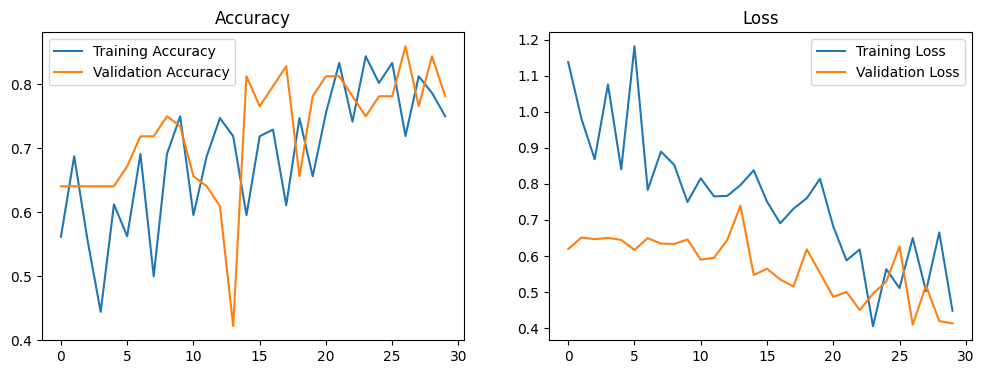

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32
epochs = 30

# **Improved Data Augmentation**
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    brightness_range=[0.7, 1.3]  # Keeping brightness adjustment
)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/archive-2/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/archive-2/test',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# **Fine-Tune Some VGG19 Layers**
for layer in base_model.layers[-5:]:  # Unfreeze last 5 layers
    layer.trainable = True

# Add custom classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# **Lower Learning Rate for Fine-Tuning**
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# **Class Weighting to Handle Imbalance**
class_weight = {0: 1.0, 1: 1.8}  # Increase weight for tomatoes

# **Early Stopping to Prevent Overfitting**
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    class_weight=class_weight,
    callbacks=[early_stop]
)

# Evaluate the model
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
print('Confusion Matrix')
print(cm)

# Classification Report
target_names = list(validation_generator.class_indices.keys())
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [ ]:


# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32
epochs = 30

# **Improved Data Augmentation**
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    brightness_range=[0.7, 1.3]
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/archive-2/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/archive-2/test',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# **Fine-Tune Some VGG19 Layers**
for layer in base_model.layers[-5:]:  # Unfreeze last 5 layers
    layer.trainable = True

# Add custom classification layers with L2 regularization and Dropout
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)  # Add L2 regularization
x = Dropout(0.5)(x)  # More dropout for generalization
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)  # Extra dense layer with L2
x = Dropout(0.4)(x)
predictions = Dense(2, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# **Lower Learning Rate for Fine-Tuning**
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# **Class Weighting to Handle Imbalance**
class_weight = {0: 1.0, 1: 1.8}  # Increase weight for tomatoes

# **Early Stopping to Prevent Overfitting**
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    class_weight=class_weight,
    callbacks=[early_stop]
)

# Evaluate the model
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
print('Confusion Matrix')
print(cm)

# Classification Report
target_names = list(validation_generator.class_indices.keys())
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


Found 210 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 328s 58s/step - accuracy: 0.6118 - loss: 1.6305 - val_accuracy: 0.6406 - val_loss: 1.3200
Epoch 2/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 4:32 55s/step - accuracy: 0.6875 - loss: 1.4028

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


6/6 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.6875 - loss: 1.4028 - val_accuracy: 0.6406 - val_loss: 1.3024
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 322s 53s/step - accuracy: 0.6184 - loss: 1.5208 - val_accuracy: 0.6406 - val_loss: 1.2980
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.6875 - loss: 1.5125 - val_accuracy: 0.6406 - val_loss: 1.2987
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 322s 53s/step - accuracy: 0.6493 - loss: 1.4442 - val_accuracy: 0.6406 - val_loss: 1.2491
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.7188 - loss: 1.3933 - val_accuracy: 0.6406 - val_loss: 1.2470
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 322s 53s/step - accuracy: 0.5666 - loss: 1.5023 - val_accuracy: 0.6406 - val_loss: 1.2354
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.7188 - loss: 1.2991 - val_accuracy: 0.6406 - val_loss: 1.2271
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 320s 53s/step - accuracy: 0.6174 - loss: 1.4021 - val_accuracy: 0.6406 - val_loss: 1.1898
Epoch 10/30

# **Resnet50**

Found 242 images belonging to 2 classes.
Found 79 images belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.5498 - loss: 0.8772 - val_accuracy: 0.7656 - val_loss: 0.5736
Epoch 2/30
1/7 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.7188 - loss: 0.6738

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7188 - loss: 0.6738 - val_accuracy: 0.7656 - val_loss: 0.5917
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 49s 7s/step - accuracy: 0.6806 - loss: 0.6559 - val_accuracy: 0.2344 - val_loss: 0.9112
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.3889 - loss: 0.8257 - val_accuracy: 0.3125 - val_loss: 0.7178
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 47s 7s/step - accuracy: 0.5661 - loss: 0.6926 - val_accuracy: 0.7500 - val_loss: 0.6191
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5312 - loss: 0.6732 - val_accuracy: 0.3438 - val_loss: 0.7270
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 46s 7s/step - accuracy: 0.5243 - loss: 0.6773 - val_accuracy: 0.7656 - val_loss: 0.5193
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5312 - loss: 0.8860 - val_accuracy: 0.7500 - val_loss: 0.5172
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 46s 7s/step - accuracy: 0.5688 - loss: 0.6847 - val_accuracy: 0.7500 - val_loss: 0.5074
Epoch 10/30
7/7 ━━━

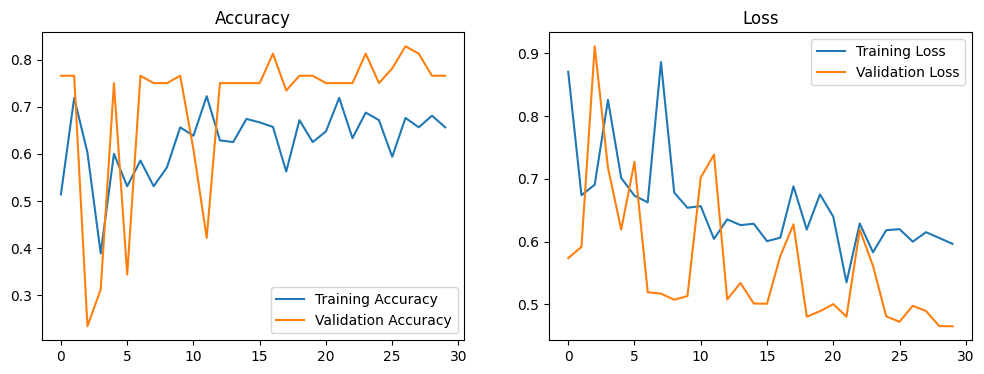

In [ ]:
# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32
epochs = 30

# Data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/archive-2/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/archive-2/test',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x) # Use GlobalAveragePooling2D instead of Flatten
x = Dense(256, activation='relu')(x)
x = Dense(2, activation='softmax')(x) # Adjust for class count

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
print('Confusion Matrix')
print(cm)

# Classification Report
target_names = list(validation_generator.class_indices.keys())
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()
